<a href="https://colab.research.google.com/github/veeralipi22/02-simple-linear-regression-assignment/blob/main/simplelinear_regression_AssignmentQ1_(N).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Question 1

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


**Eda and data visualization**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


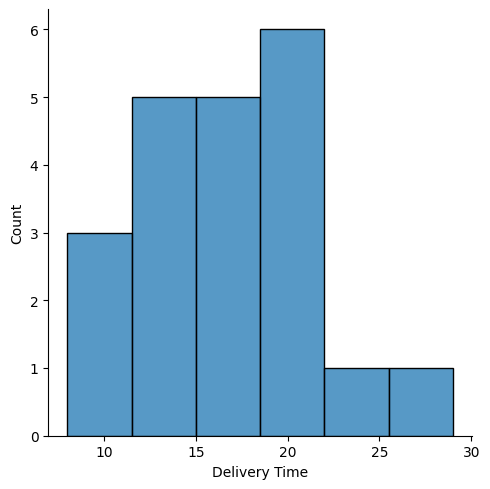

In [ ]:
sns.displot(data['Delivery Time'])

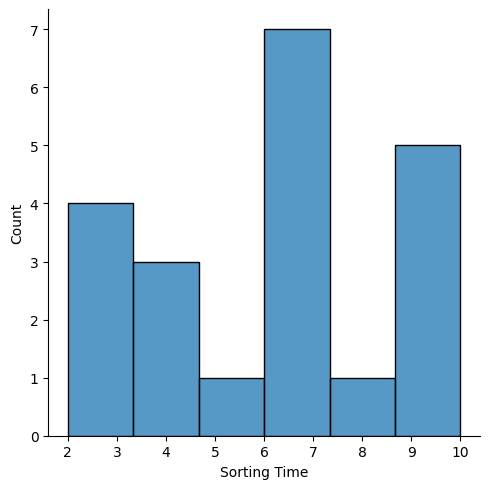

In [ ]:
sns.displot(data['Sorting Time'])

In [ ]:
#renaming columns
data= data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)


In [ ]:
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


**Correlation Analysis**

In [ ]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='delivery_time', ylabel='sorting_time'>

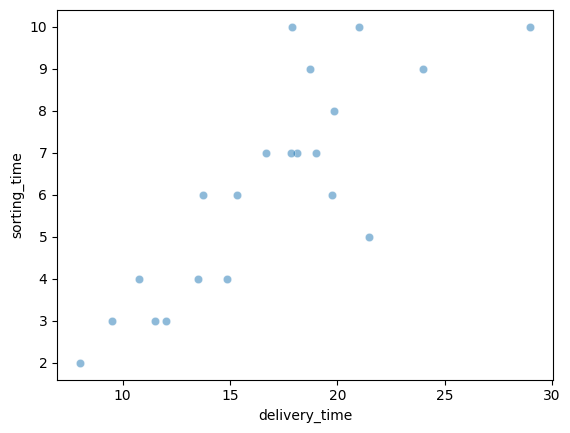

In [ ]:
#creating scatterplot
sns.scatterplot(x='delivery_time', y='sorting_time', data=data, alpha=0.5)

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

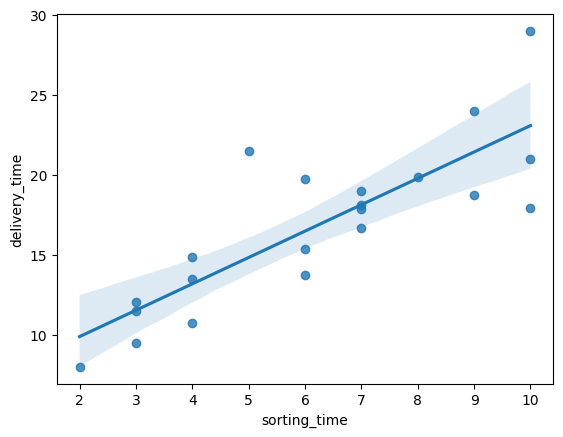

In [ ]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])


Applying Transformations:

In [ ]:
X = data.iloc[:, 1]
Y = data.iloc[:,0]

log

In [ ]:
import numpy as np

# Apply the log transformation to the independent variable
X_transformed = np.log(X)


square

In [ ]:
X1_transformed = np.square(X)


sqrt

In [ ]:
X2_transformed = np.sqrt(X)

**model building**

In [ ]:
#creating the model
model = smf.ols('delivery_time~sorting_time',data=data).fit()

Make predictions using the transformed independent variable:

In [ ]:
Y_pred = model.predict(X_transformed)
Y_pred

0     10.379743
1      8.868761
2      9.537381
3     10.206001
4     10.379743
5      9.537381
6      9.791579
7      8.394367
8     10.379743
9     10.206001
10    10.011774
11     8.868761
12     9.791579
13     8.394367
14     8.394367
15     8.868761
16     9.537381
17     9.791579
18     7.725747
19     9.791579
20     9.236729
dtype: float64

In [ ]:
Y_pred1 = model.predict(X1_transformed)
Y_pred1

0     171.484724
1      32.967052
2      65.947450
3     140.153346
4     171.484724
5      65.947450
6      87.384709
7      21.423913
8     171.484724
9     140.153346
10    112.120007
11     32.967052
12     87.384709
13     21.423913
14     21.423913
15     32.967052
16     65.947450
17     87.384709
18     13.178814
19     87.384709
20     47.808231
dtype: float64

In [ ]:
Y_pred2 = model.predict(X2_transformed)
Y_pred2

0     11.797393
1      9.880774
2     10.621991
3     11.529794
4     11.797393
5     10.621991
6     10.945631
7      9.438920
8     11.797393
9     11.529794
10    11.246867
11     9.880774
12    10.945631
13     9.438920
14     9.438920
15     9.880774
16    10.621991
17    10.945631
18     8.914800
19    10.945631
20    10.270055
dtype: float64

**RMSE**

In [ ]:
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(Y, Y_pred))
rmse1 = math.sqrt(mean_squared_error(Y, Y_pred1))
rmse2 = math.sqrt(mean_squared_error(Y, Y_pred2))



In [ ]:
rmse

8.54480816791041

In [ ]:
rmse1

79.36130104042175

In [ ]:
rmse2

7.520971831279722

Back-Transform RMSE:

In [ ]:
#log
original_rmse = math.exp(rmse)
original_rmse

5139.99902063066

In [ ]:
#square
original_rmse1 = math.exp(rmse1)
original_rmse

5139.99902063066

In [ ]:
#sqrt
original_rmse2 = math.exp(rmse2)
original_rmse

5139.99902063066

Model Testing

In [ ]:
# To see a summary of the regression results
# Finding Coefficient parameters

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           3.98e-06
Time:                        18:43:28   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
#giving new values to test the model
new_data=pd.Series([5,6,8])
new_data

0    5
1    6
2    8
dtype: int64

In [ ]:
new_df = pd.DataFrame(new_data,columns=['sorting_time'])

In [ ]:
new_df

,sorting_time
0,5
1,6
2,8


In [ ]:
model.predict(new_df)

0    14.827833
1    16.476853
2    19.774893
dtype: float64